<h1 style='color: green; font-size: 36px; font-weight: bold;'>House Sales in King County, USA</h1>

# <font color='red' style='font-size: 30px;'>1.1 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

In [1]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/harlfoxem/housesalesprediction

### Descrição: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015:


**id** - Unique ID for each home sold

**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not

**view** - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

**sqft_above** - The square footage of the interior housing space that is above ground level

**sqft_basement** - The square footage of the interior housing space that is below ground level

**yr_built** - The year the house was initially built

**yr_renovated** - The year of the house’s last renovation

**zipcode** - What zipcode area the house is in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Leitura dos dados

In [4]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio próprio/kc_house_data.csv')

## Visualizar os dados

In [5]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Verificando o tamanho do dataset

In [6]:
dados.shape

(21613, 21)

# <font color='red' style='font-size: 30px;'>1.2 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
dados.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [8]:
dados.corr().round(4)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0000,-0.0168,0.0013,0.0052,-0.0123,-0.1321,0.0185,-0.0027,0.0116,-0.0238,0.0081,-0.0108,-0.0052,0.0214,-0.0169,-0.0082,-0.0019,0.0208,-0.0029,-0.1388
price,-0.0168,1.0000,0.3083,0.5251,0.7020,0.0897,0.2568,0.2664,0.3973,0.0364,0.6674,0.6056,0.3238,0.0540,0.1264,-0.0532,0.3070,0.0216,0.5854,0.0824
bedrooms,0.0013,0.3083,1.0000,0.5159,0.5767,0.0317,0.1754,-0.0066,0.0795,0.0285,0.3570,0.4776,0.3031,0.1542,0.0188,-0.1527,-0.0089,0.1295,0.3916,0.0292
bathrooms,0.0052,0.5251,0.5159,1.0000,0.7547,0.0877,0.5007,0.0637,0.1877,-0.1250,0.6650,0.6853,0.2838,0.5060,0.0507,-0.2039,0.0246,0.2230,0.5686,0.0872
sqft_living,-0.0123,0.7020,0.5767,0.7547,1.0000,0.1728,0.3539,0.1038,0.2846,-0.0588,0.7627,0.8766,0.4350,0.3180,0.0554,-0.1994,0.0525,0.2402,0.7564,0.1833
sqft_lot,-0.1321,0.0897,0.0317,0.0877,0.1728,1.0000,-0.0052,0.0216,0.0747,-0.0090,0.1136,0.1835,0.0153,0.0531,0.0076,-0.1296,-0.0857,0.2295,0.1446,0.7186
floors,0.0185,0.2568,0.1754,0.5007,0.3539,-0.0052,1.0000,0.0237,0.0294,-0.2638,0.4582,0.5239,-0.2457,0.4893,0.0063,-0.0591,0.0496,0.1254,0.2799,-0.0113
waterfront,-0.0027,0.2664,-0.0066,0.0637,0.1038,0.0216,0.0237,1.0000,0.4019,0.0167,0.0828,0.0721,0.0806,-0.0262,0.0929,0.0303,-0.0143,-0.0419,0.0865,0.0307
view,0.0116,0.3973,0.0795,0.1877,0.2846,0.0747,0.0294,0.4019,1.0000,0.0460,0.2513,0.1676,0.2769,-0.0534,0.1039,0.0848,0.0062,-0.0784,0.2804,0.0726
condition,-0.0238,0.0364,0.0285,-0.1250,-0.0588,-0.0090,-0.2638,0.0167,0.0460,1.0000,-0.1447,-0.1582,0.1741,-0.3614,-0.0606,0.0030,-0.0149,-0.1065,-0.0928,-0.0034


# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

In [9]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [10]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

# style -> white, dark, whitegrid, darkgrid, ticks


## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

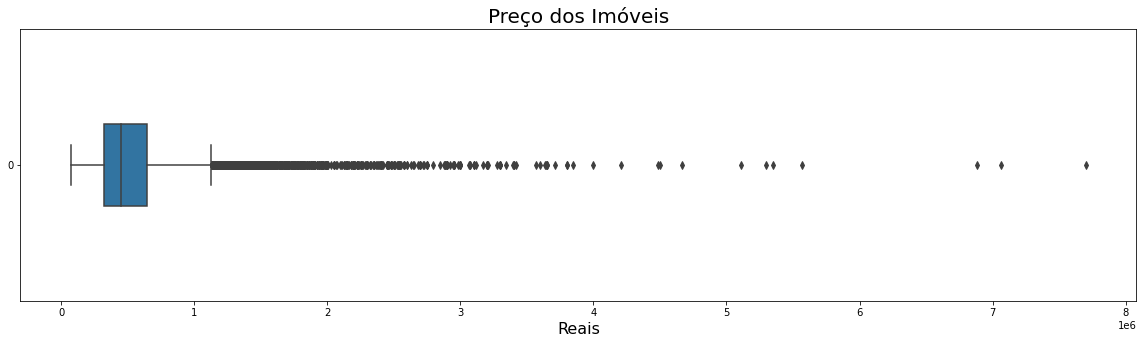

In [11]:
ax = sns.boxplot(data=dados['price'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

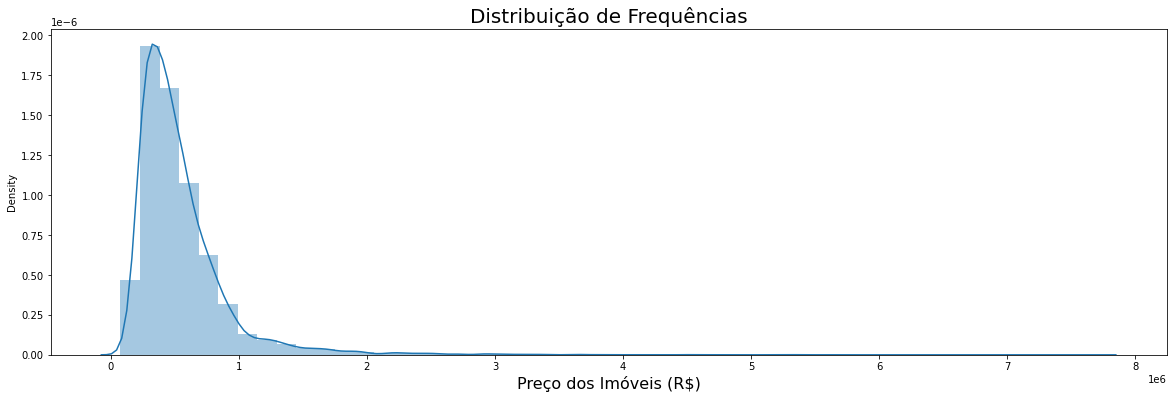

In [12]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

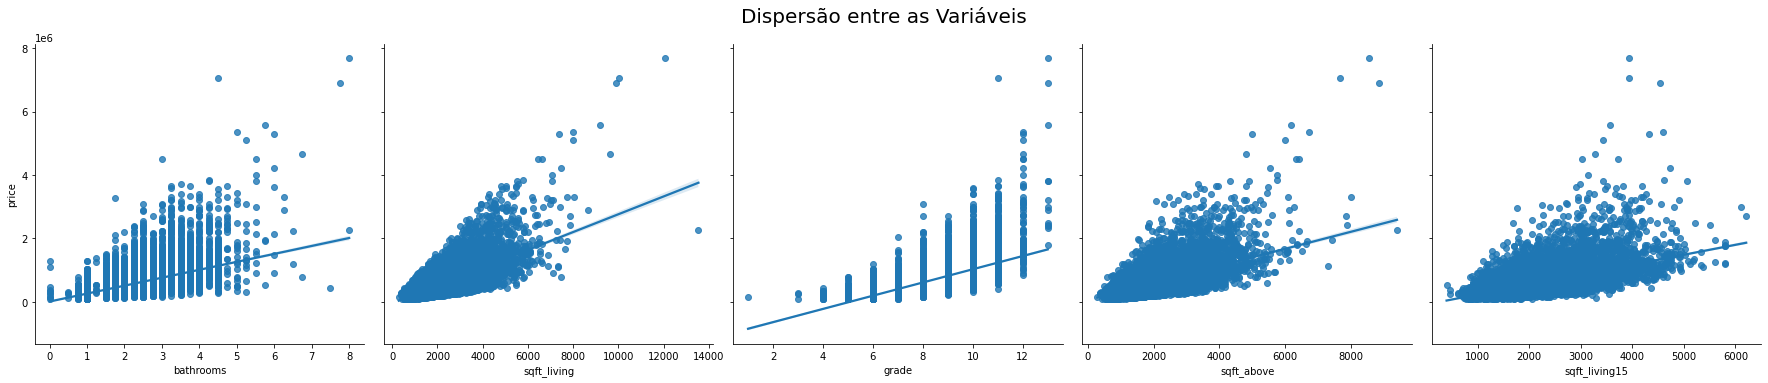

In [13]:
ax = sns.pairplot(dados, y_vars='price', x_vars=['bathrooms','sqft_living', 'grade', 'sqft_above','sqft_living15'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

In [14]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [15]:
dados['log_price'] = np.log(dados['price'])
dados['log_bathrooms'] = np.log(dados['bathrooms']+1)
dados['log_sqft_living'] = np.log(dados['sqft_living'])
dados['log_grade'] = np.log(dados['grade'] + 1)
dados['log_sqft_above'] = np.log(dados['sqft_above'])
dados['log_sqft_living15'] = np.log(dados['sqft_living15'])

In [16]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_bathrooms,log_sqft_living,log_grade,log_sqft_above,log_sqft_living15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,0.693147,7.073270,2.079442,7.073270,7.200425
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,1.178655,7.851661,2.079442,7.682482,7.432484
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,0.693147,6.646391,1.945910,6.646391,7.908387
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,1.386294,7.580700,2.079442,6.956545,7.215240
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,1.098612,7.426549,2.197225,7.426549,7.495542


## Distribuição de frequências da variável *dependente transformada* (y)

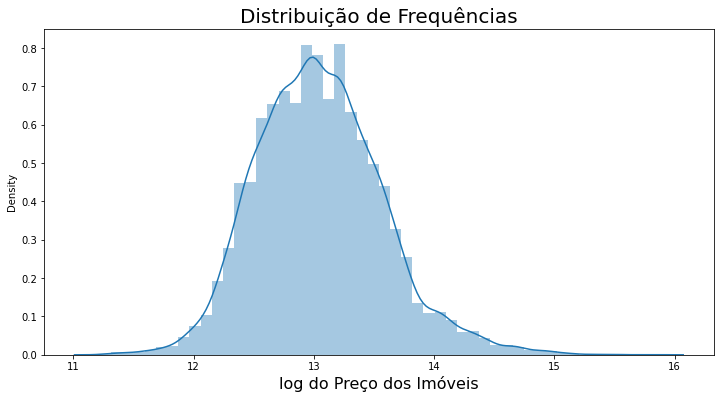

In [17]:
ax = sns.distplot(dados['log_price'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

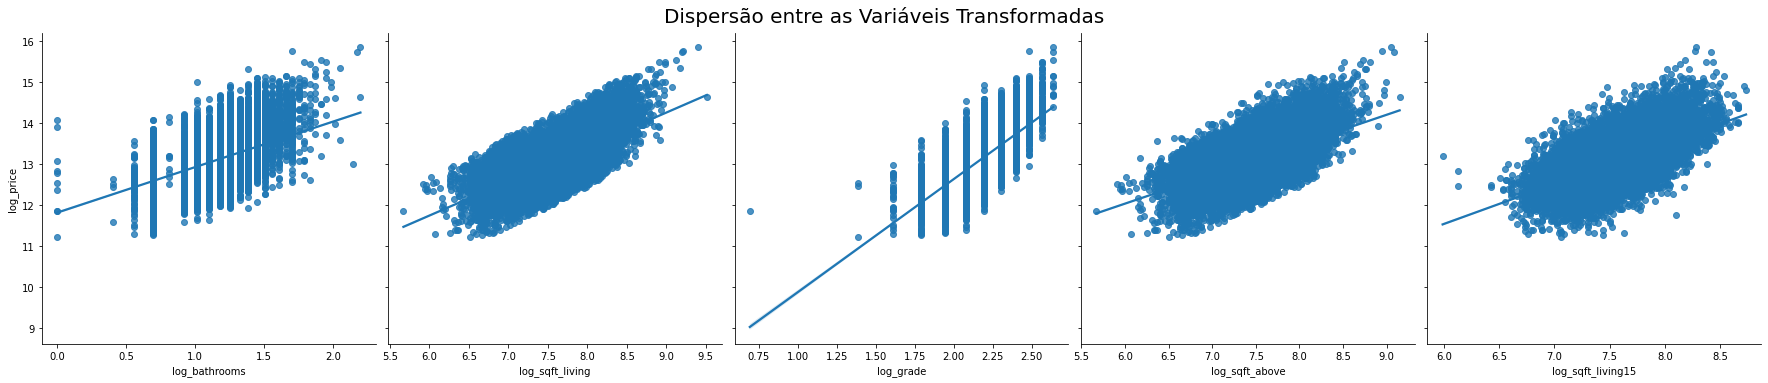

In [26]:
ax = sns.pairplot(dados, y_vars='log_price', x_vars=['log_bathrooms', 'log_sqft_living', 'log_grade', 'log_sqft_above', 'log_sqft_living15'], kind='reg',height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

In [20]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [21]:
y = dados['log_price']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [27]:
X = dados[['log_bathrooms', 'log_sqft_living', 'log_grade', 'log_sqft_above', 'log_sqft_living15']]
train_test_split(X, y, test_size=0.2, random_state=2811)

[       log_bathrooms  log_sqft_living  ...  log_sqft_above  log_sqft_living15
 15218       1.252763         7.958577  ...        7.958577           7.882315
 17470       1.386294         8.271293  ...        7.969012           8.194229
 13913       1.252763         7.600902  ...        7.170120           7.654443
 6687        1.178655         7.528332  ...        7.528332           7.533694
 5992        1.098612         7.293018  ...        7.293018           7.073270
 ...              ...              ...  ...             ...                ...
 15940       1.011601         7.138867  ...        7.138867           7.495542
 979         0.693147         6.937314  ...        6.937314           7.146772
 10581       0.693147         6.672033  ...        6.672033           7.265430
 8639        1.011601         7.383989  ...        7.177782           7.700748
 2008        0.693147         6.993933  ...        6.993933           7.512071
 
 [17290 rows x 5 columns],
        log_bathrooms  

## Criando os datasets de treino e de teste

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [29]:
X_train

,log_bathrooms,log_sqft_living,log_grade,log_sqft_above,log_sqft_living15
15218,1.252763,7.958577,2.197225,7.958577,7.882315
17470,1.386294,8.271293,2.302585,7.969012,8.194229
13913,1.252763,7.600902,2.079442,7.170120,7.654443
6687,1.178655,7.528332,2.079442,7.528332,7.533694
5992,1.098612,7.293018,1.945910,7.293018,7.073270
...,...,...,...,...,...
15940,1.011601,7.138867,2.079442,7.138867,7.495542
979,0.693147,6.937314,2.079442,6.937314,7.146772
10581,0.693147,6.672033,2.079442,6.672033,7.265430
8639,1.011601,7.383989,2.197225,7.177782,7.700748


# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



In [30]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [31]:
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante

,const,log_bathrooms,log_sqft_living,log_grade,log_sqft_above,log_sqft_living15
15218,1.0,1.252763,7.958577,2.197225,7.958577,7.882315
17470,1.0,1.386294,8.271293,2.302585,7.969012,8.194229
13913,1.0,1.252763,7.600902,2.079442,7.170120,7.654443
6687,1.0,1.178655,7.528332,2.079442,7.528332,7.533694
5992,1.0,1.098612,7.293018,1.945910,7.293018,7.073270
...,...,...,...,...,...,...
15940,1.0,1.011601,7.138867,2.079442,7.138867,7.495542
979,1.0,0.693147,6.937314,2.079442,6.937314,7.146772
10581,1.0,0.693147,6.672033,2.079442,6.672033,7.265430
8639,1.0,1.011601,7.383989,2.197225,7.177782,7.700748


In [32]:
modelo_statsmodels = sm.OLS(y_train,X_train_com_constante,hasconst = True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [33]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     4299.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:56:50   Log-Likelihood:                -6493.0
No. Observations:               17290   AIC:                         1.300e+04
Df Residuals:                   17284   BIC:                         1.304e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.2611      0.07

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [34]:
X = dados[['log_grade', 'log_sqft_living']]

## Criando os datasets de treino e de teste

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Estimando o modelo com o statsmodels

In [36]:
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [37]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                 1.008e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:04:25   Log-Likelihood:                -6796.3
No. Observations:               17290   AIC:                         1.360e+04
Df Residuals:                   17287   BIC:                         1.362e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.0255      0.050    1

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Instanciando a classe *LinearRegression()*

In [39]:
modelo =  LinearRegression() 

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [40]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [41]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.538


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [42]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [43]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.536


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [44]:
entrada = X_test[0:1]
entrada

,log_grade,log_sqft_living
3490,2.302585,8.058327


## Gerando previsão pontual

In [45]:
modelo.predict(entrada)[0]

13.536081497622616

## Invertendo a transformação para obter a estimativa em $

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [46]:
np.exp(modelo.predict(entrada)[0]) 

756215.3715725035

## Criando um simulador simples

In [48]:
Grade = 10
Area_imovel = 1000
entrada = [[np.log(Grade+1), np.log(Area_imovel)]]

print('$ {0: 2f}'.format(np.exp(modelo.predict(entrada)[0])))

$  542354.646570


# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em $.</p>

In [49]:
modelo.intercept_

6.025524415944762

In [50]:
np.exp(modelo.intercept_)

413.8586191836918

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [51]:
modelo.coef_

array([1.7448706, 0.4334453])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [52]:
X.columns

Index(['log_grade', 'log_sqft_living'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [55]:
index = ['Intercepto','log_grade','log_sqft_living']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [56]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,6.025524
log_grade,1.744871
log_sqft_living,0.433445


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>$ 413,85</b> (exp[6.02552]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Grade</b> → Mantendo-se o valor de $X_3$ (metragem quadrada) constante, um acréscimo de 1% no grade de um imóvel gera, em média, um acréscimo de <b>1.74%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Metragem quadrada (m2)</b> → Mantendo-se o valor de $X_2$ (Grade) constante, um acréscimo de 1% na área de um imóvel, em média, um acréscimo de <b>0.43%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [57]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

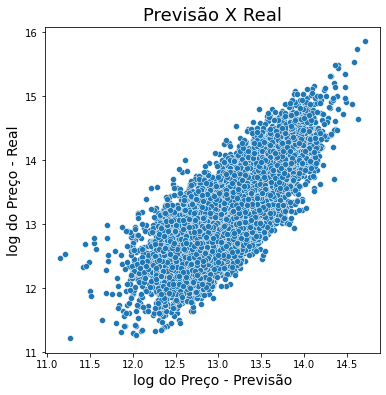

In [63]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(6, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

## Obtendo os resíduos

In [64]:
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

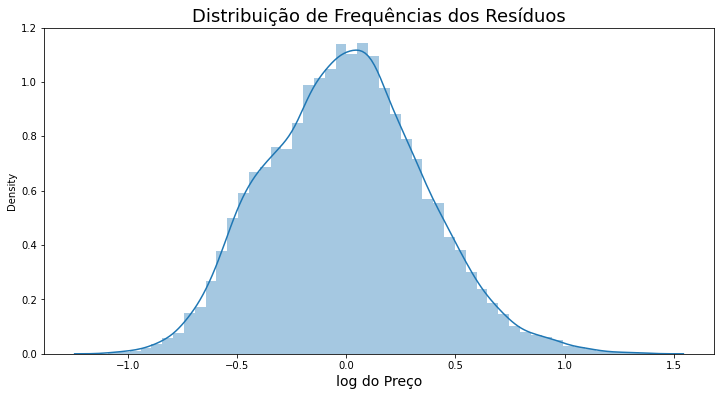

In [65]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax